In [8]:
from experiments.independent.correlations import correlation_heatmap, normalize
from experiments.independent import load_results, get_metric
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import ppscore
import pandas as pd
from scipy.stats import norm, ttest_ind

In [9]:
DATA_DIR = "../../out/nonshuffled/ImageNette"
all_data, metadata = load_results(DATA_DIR)
methods = list(all_data.keys())
print("\n".join(methods))

SmoothGrad
Random
InputXGradient
Gradient


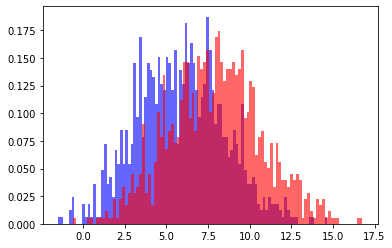

In [10]:
metric_results = get_metric(all_data, "deletion")
#data1 = (np.max(metric_results["Random"], axis=1) - np.mean(metric_results["Random"], axis=1)) / (np.max(metric_results["Random"], axis=1) - np.min(metric_results["Random"], axis=1)).flatten()
#data2 = (np.max(metric_results["InputXGradient"], axis=1) - np.mean(metric_results["InputXGradient"], axis=1)) / (np.max(metric_results["InputXGradient"], axis=1) - np.min(metric_results["InputXGradient"], axis=1)).flatten()
data1 = metric_results["Random"][:, 0] - np.mean(metric_results["Random"][:, 1:], axis=1)
data2 = metric_results["SmoothGrad"][:, 0] - np.mean(metric_results["SmoothGrad"][:, 1:], axis=1)

# Plot the histogram
plt.hist(data1, bins=100, density=True, alpha=0.6, color="b")
plt.hist(data2, bins=100, density=True, alpha=0.6, color="r")

# Plot the PDF.
"""
for d in (data1, data2):
    mu, std = norm.fit(d)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
"""
plt.show()

In [11]:
ttest_ind(data1, data2)

Ttest_indResult(statistic=-17.361357503835816, pvalue=4.2993811257964926e-63)